In [5]:
# libraries
options(repr.plot.width=4, repr.plot.height=4)
library(rethinking)

# Q1
- The weights listed below were recorded in the !Kung census, but heights
were not recorded for these individuals.
- Provide predicted heights and 89%
compatibility intervals for each of these individuals.
- That is, fill in the table
below, using model-based predictions.

### Model

In [6]:
# We want to predict height using weight.(model)
# Individual | weight | expected height | 89% interval<p>
#      1     | 45
#      2     | 40
#      3     | 65
#      4     | 31
#      5     | 53

data(Howell1)
d <- Howell1

# Standardize data
std.d <- data.frame(scale(d))
# attributes(scale(d))

# data is at the individual level.
flist <- alist(
    height ~ dnorm( mu, sigma ),
    mu <- a + b1*weight ,
    a ~ dnorm(0,1),
    b1 ~ dlnorm(0,1),
    sigma ~ dlnorm(0,1)
)
model <- quap(flist = flist, data =list(height=std.d$height,
                                        weight=std.d$weight))
model


Quadratic approximate posterior distribution

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b1 * weight
a ~ dnorm(0, 1)
b1 ~ dlnorm(0, 1)
sigma ~ dlnorm(0, 1)

Posterior means:
           a           b1        sigma 
5.912326e-07 9.406222e-01 3.386133e-01 

Log-likelihood: -182.77 

### Prediction

In [7]:
# What I want to predict
d.pred <- data.frame(
    weight = c(45,40,65,31,53)
)
# Convert weights to z-score because data was standardized
z.score <- function(x) {(x - 35.6106175924632)/27.6024476405647}
# z.score(d.pred$weight)
# 0.340164848052754 0.159021492031965 1.06473827213591 -0.167036548805455 0.629994217686017

# Uncertainty around parameter mu
height.posterior <- link(fit = model,data=list(weight=z.score(d.pred$weight)))

# Uncertainty around sampling (predictions)
sim.height <- sim( model , data = list(weight=z.score(d.pred$weight)) )
# extract.samples(model) # parameters

# Since we standardized before the modeling we now reverse the standardization.
# also we use the mu and sd of the target variable (height)

# Unstandardized height
rev.z.score <- function(x) {(138.263596323529)+x*(20.746888222142)}

# Height Predictions are.. 
d.pred$mu <- apply( rev.z.score(sim.height) , 2 , mean)
d.pred$Lower89 <- apply( rev.z.score(sim.height) , 2 , PI,  prob=0.89 )[1,]
d.pred$Upperr89 <- apply( rev.z.score(sim.height) , 2 , PI,  prob=0.89 )[2,]
round(d.pred,1)

weight,mu,Lower89,Upperr89
45,144.8,133.4,156.4
40,141.1,129.6,151.8
65,158.9,147.5,169.6
31,134.7,123.2,146.0
53,150.6,140.2,162.0


### Plot

In [8]:
# Plots
plot( individual ~ height , list(
    height = rev.z.score(apply( sim.height , 2 , mean, prob=0.89 )),
    individual = c(1,2,3,4,5)
) , col=col.alpha(rangi2,1), xlim=c(120,170),
     pch = 16, main='individual ~ height')
# extra remove brackets
[for ( i in 1:5 )
    lines(x=c(rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
              rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+i])),
          y=c(i,i), lwd = 2 )
# needed multiple for loops because didnt work otherwise.
for ( i in 1:5 )
    abline(v=rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
           lty=2,
           col=c(ifelse((i+(i-1)) %% 2 ==0,'green','blue'),col.alpha(rangi2,0.5)),
           lwd=2)
for ( i in 1:5 )
    abline(v=rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+i]),
           lty=2,
           col=ifelse((i+(i-1)) %% 2 ==0,'blue','green'),
           lwd=0)
abline(v = mean(d$height), col='red', lty=2, lwd=2)]

ERROR: Error in parse(text = x, srcfile = src): <text>:8:1: unexpected '['
7: # extra remove brackets
8: [
   ^


# Q2
- Model the relationship between height (cm) and the natural logarithm of
weight (log-kg):<p> log(weight).
- Use the entire Howell1 data frame, all 544 rows, adults and non-adults. 
- Use any model type from Chapter 4 that you think useful:
- an ordinary linear regression, a polynomial or a spline. 
- Plot the posterior predictions against the raw data.

In [ ]:
# model
d$log_weight <- log(d$weight)
# Standardize data
std.d2 <- data.frame(scale(d))
# data is at the individual level
flist <- alist(
    height ~ dnorm( mu, sigma ),
    mu <- a + b1*log_weight ,
    a ~ dnorm(0,1),
    b1 ~ dlnorm(0,1),
    sigma ~ dlnorm(0,1)
)
model1 <- quap(flist = flist, data =list(height=std.d2$height,
                                         log_weight=std.d2$log_weight) )
model1

In [ ]:
# Predictions
# z-scores for log_weight
z_score_log <- function(x) {(x - 3.44232984801386)/0.575959647001175}

# unstandardize weights
inv_z_score_log <- function(x) {138.263596323529 + (x*27.6024476405647)}

# Uncertainty around parameter.
height.posterior <- link(fit = model1,data=list(log_weight=z_score_log(log(d.pred$weight))))
# Uncertainty around sampling,prediction
sim.height <- sim( model1 , data = list(log_weight=z_score_log(log(d.pred$weight))) )
# prediction
inv_z_score_log(apply(sim.height, 2, PI, .89))
inv_z_score_log(apply(sim.height, 2, mean))

### Plot

In [ ]:
# Plot not working in tablet env
plot( individual ~ height , list(
    height = inv_z_score_log(apply( sim.height , 2 , mean, prob=0.89 )),
    individual = c(1,2,3,4,5)
) , col=col.alpha(rangi2,1), xlim=c(126,185),
     pch = 16 )
for ( i in 1:5 )
    lines(x=c(inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
              inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+i])),
          y=c(i,i), lwd = 2 )
# needed multiple for loops because didnt work otherwise.
for ( i in 1:5 )
    abline(v=inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
           lty=2,
           col=c(ifelse((i+(i-1)) %% 2 ==0,'green','blue'),col.alpha(rangi2,0.5)),
           lwd=2)
for ( i in 1:5 )
    abline(v=inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+i]),
           lty=2,
           col=ifelse((i+(i-1)) %% 2 ==0,'blue','green'),
           lwd=0)
abline(v = mean(d$height), col='red', lty=2, lwd=2)

In [ ]:
# Plot 2 (zoom in)
seq.w <- seq(3, 64, 1)

sim.height_vs_data <- sim( model1 ,
                          data = list(log_weight=z_score_log(log(seq.w))))

mu.height <- link(model1 , data = list(log_weight=z_score_log(log(seq.w))))

mu <- inv_z_score_log(apply( mu.height , 2 , mean ))

mu.PI <- inv_z_score_log(apply( mu.height , 2 , PI, prob=0.89 ))

height.PI <- inv_z_score_log(apply( sim.height_vs_data , 2 , PI, prob=0.89 ))

plot(d$height~d$log_weight,
     col=col.alpha(rangi2,0.5),
     xlim=range(20,26),
     ylim=range(110,130)
    )
lines(seq.w, mu )
shade(mu.PI, seq.w )
shade(height.PI, seq.w )

In [ ]:
# q-q plot actual ~ predictions
plot(d$height~inv_z_score_log(apply(link(model1) , 2 , mean )),
     xlab = 'Mu Model Posterior'
    )
abline(a = 0, b = 1 )

In [ ]:
# dens plot
dens(d$height, col='black')
dens(inv_z_score_log(sim.height_vs_data), ylim=range(0,0.03), col='red', add = TRUE)
abline(v = mean(inv_z_score_log(sim.height_vs_data)), col='red', lty=2, lwd=2)
abline(v = mean(d$height), col='black', lty=2, lwd=2)

# Q3
- Plot the prior predictive distribution for the polynomial regression model in Chapter 4.  
Section 4.5.1 (pg.111)
- You can modify the code that plots the linear regression prior predictive distribution. 
- 20 or 30 parabolas from the prior should suffice to show where the prior probability resides.
- Can you modify the prior distributions of α, β1, and β2 so that the prior
predictions stay within the biologically reasonable outcome space?
- That is to say: Do not try to fit the data by hand.
- But do try to keep the curves consistent with what you know about height and weight,
before seeing these exact data.


In [65]:
# model
library(rethinking)
data(Howell1)
d <- Howell1
d$weight_s <- ( d$weight - mean(d$weight) )/sd(d$weight)
d$weight_s2 <- d$weight_s^2
m4.5 <- quap(
    alist(
    height ~ dnorm( mu , sigma ) ,
    mu <- a + b1*weight_s + b2*weight_s2 ,
    a ~ dnorm( 178 , 20 ) ,
    b1 ~ dlnorm( 0 , 1 ) ,
    b2 ~ dnorm( 0 , 1 ) ,
    sigma ~ dunif( 0 , 50 )
    ) ,
    data=d )

set.seed(45) #45 
prior <- extract.prior( m4.5 )
precis(prior)

,mean,sd,5.5%,94.5%,histogram
a,177.60867247,20.7249835,144.1785056,211.421234,<U+2581><U+2581><U+2583><U+2587><U+2587><U+2582><U+2581><U+2581>
b1,1.61236478,1.8754510,0.1867143,4.433442,<U+2587><U+2582><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581>
b2,-0.05036862,0.9688063,-1.6422983,1.447121,<U+2581><U+2581><U+2581><U+2582><U+2583><U+2585><U+2587><U+2587><U+2585><U+2583><U+2581><U+2581><U+2581>
sigma,25.14432248,14.5856372,2.5161320,47.371388,<U+2587><U+2587><U+2585><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587>


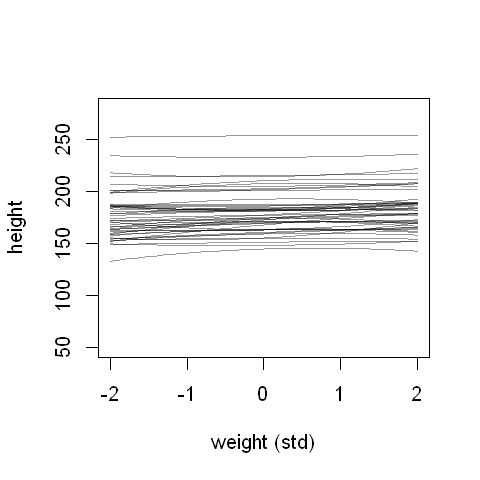

In [71]:
# plot
# mu <- link( m4.5 , post=prior , data=list( a=c(178,178), weight_s=c(-3,3), weight_s2=c(-3,3)))
# made mistake above w^2 has to be 9 and always positive.
# solution doesn't include alpha..why?
w_seq <- seq( from=-2 , to=2 , # min and max of d$weight_s as per solution.
    length.out=50 )
w2_seq <- w_seq^2

mu <- link( m4.5 , post=prior , data=list( weight_s=w_seq, weight_s2=w2_seq))

plot( NULL , xlim=c(-2,2) , ylim=c(50,280) ,
    xlab="weight (std)" , ylab="height")
for ( i in 1:50 ) lines( w_seq , mu[i,] , col=col.alpha("black",0.4) )

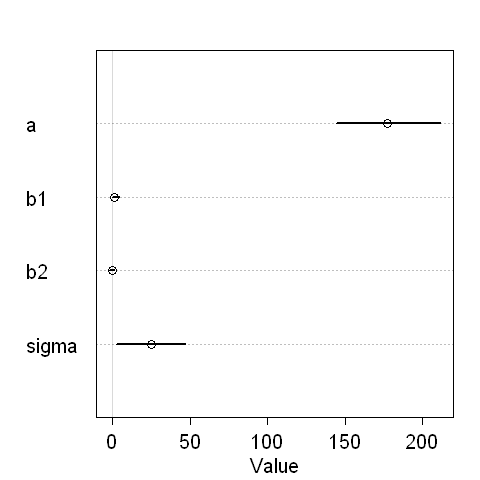

In [72]:
plot(precis(prior))

In [ ]:
# Q3 was hard. Not sure why we didnt include alpa in link() because
# not including the other parameters makes link() fail.
# Also, I mesed up the sample data I didn't include the w^2 correctly. oops.
# Otherwise everything was the same. take away is flat priors is anything goes
# but the prior dont matter here because theres a lot of data so the likelihood
# overwhelms any priors and the model is simple. but wont be the case in more
# complicated cases.